<img src="imgs/dh_logo.png" align="right" width="50%">

-------------

# Hiper-parâmetros da Random Forest

#### O [`scikit`]() possui duas implementações de Random Forest: [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).

### Para regressão os Hiperparâmetros são os seguintes:

   - `n_estimators` — O número de árvores na floresta (default = 10);
   
   - `criterion` — A função usada para medir a qualidade de uma divisão. Os critérios suportados são "mse" para o erro quadrático médio, que é igual à redução da variância como critério de seleção de recurso, e "mae" para o erro absoluto médio (padrão = "mse");
   
   - `max_features` — O número de recursos a serem considerados ao procurar a melhor divisão. Você pode especificar o número ou porcentagem de recursos, ou escolher entre os valores disponíveis: "auto" (todos os recursos), "sqrt", "log2". (default = "auto");
   
   -  `max_depth` — A profundidade máxima da árvore. o padrão significa que os nós são expandidos até que todas as folhas sejam puras ou até que todas as folhas contenham menos do que `min_samples_split` samples;
     
   -  `min_samples_split` — O número mínimo de amostras necessárias para dividir um nó interno. Pode ser especificado como o número ou como uma porcentagem de um número total de amostras (default = 2);
   
   -  `min_samples_leaf` — O número mínimo de amostras necessárias em um nó folha (default = 1);
   
   -  `min_weight_fraction_leaf` — A fração mínima ponderada da soma total dos pesos (de todas as amostras de entrada) necessária para estar em um nó folha. As amostras têm peso igual quando `sample_weight` não é fornecido (default = 0);
   
   - `max_leaf_nodes` — O número máximo de folhas (default = no restrictions);
   
   - `min_impurity_split` — Limite para parada precoce no crescimento da árvore. Um nó irá se dividir se sua impureza estiver acima do limite, caso contrário, é uma folha (default = 1е-7);
   
   - `bootstrap` — Se as amostras de bootstrap são usadas ao construir árvores (default = True);
   
   - `oob_score` — se deve usar amostras `out-of-bag` para estimar o $R^{2}$ em dados não vistos (default = False);
   
   - `n_jobs` — O número de tarefas (`jobs`) a serem executadas em paralelo para ajuste (`fit`) e previsão (`predict`). Se $-1$, então o número de trabalhos é definido como o número de núcleos `cores` (default = 1);
   
   - `random_state` — Se `int`, `random_state` é a semente usada pelo gerador de número aleatório; se a instância `RandomState`, `random_state` é o gerador de número aleatório; se nenhum, o gerador de número aleatório é a instância `RandomState` usada por `np.random`; 
   
   - `verbose` — Controla o detalhamento do processo de construção da árvore (default = 0);
   
   - `warm_start` — Quando definido como `True`, reutiliza a solução da chamada anterior para ajustar (`fit`) e adicionar mais estimadores ao conjunto, caso contrário, apenas ajusta (`fit`) uma floresta totalmente nova (default = False).
   
### Para classificação, os Hiprparâmetros são quase idênticos. O que difere é:

   - `criterion` — A função usada para medir a qualidade de uma divisão. Os critérios suportados são [`gini`](https://medium.com/@analyttica/gini-coefficient-or-gini-index-in-our-data-science-analytics-platform-d0408fc83772#:~:text=The%20Gini%20Coefficient%20or%20Gini,commonly%20used%20measure%20of%20inequality.) para a [impureza de Gini](https://medium.com/analytics-steps/understanding-the-gini-index-and-information-gain-in-decision-trees-ab4720518ba8) e [`entropy`](https://machinelearningmastery.com/what-is-information-entropy/) para o [ganho de informação](https://blog.clairvoyantsoft.com/entropy-information-gain-and-gini-index-the-crux-of-a-decision-tree-99d0cdc699f4). Notas: este parâmetro é específico da árvore. (default = "gini");
   
   - `class_weight` — O peso de cada classe. Por padrão, todos os pesos são iguais a $1$, mas você pode criar um dicionário com pesos ou especificá-lo como "balanceado" - usa os valores das classes para ajustar automaticamente os pesos inversamente proporcionais às frequências da classe nos dados de entrada ou como "subamostra balanceada" - o mesmo que "balanceado", exceto que os pesos são calculados com base na amostra de `bootstrap` para cada árvore cultivada.

   ### O que precisamos ter maior atenção quando construirmos um modelo de RF:

   - `n_estimators` — O número de árvores na floresta;
   
   - `criterion` — A função usada para medir a qualidade de uma divisão.;
   
   - `max_features` — O número de recursos a serem considerados ao procurar a melhor divisão;

   - `min_samples_leaf` — O número mínimo de amostras necessárias em um nó folha;

   - `max_depth` — A profundidade máxima da árvore.

-------------

# Random Forest para Churn

#### Agora usaremos [Random Forest](https://www.youtube.com/watch?v=D_2LkhMJcfY&ab_channel=AugmentedStartups) para atacar um problema de [`churn`](https://towardsdatascience.com/predict-customer-churn-in-python-e8cd6d3aaa7) (classificação). O primeiro passo é construir um modelo básico para baseline. Utilizaremos os dados da competição [Telco Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn), no [`Kaggle`](https://www.kaggle.com/).

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("telecom_churn.csv", 
                 delimiter = ','
                )
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [21]:
# Choose the numeric features
cols = []
for i in df.columns:
    if (df[i].dtype == "float64") or (df[i].dtype == 'int64'):
        cols.append(i)
        
# Divide the dataset into the input and target
X, y = df[cols].copy(), np.asarray(df["churn"], 
                                   dtype = 'int8'
                                  )

# Initialize a stratified split of our dataset for the validation process
skf = StratifiedKFold(n_splits = 5, 
                      shuffle = True, 
                      random_state = 42
                     )

# Initialize the classifier with the default parameters 
rfc = RandomForestClassifier(random_state = 42, 
                             n_jobs = -1
                            )

# Train it on the training set
results = cross_val_score(rfc, 
                          X, 
                          y, 
                          cv = skf
                         )

# Evaluate the accuracy on the test set
print("CV accuracy score: {:.2f}%".format(results.mean() * 100))

CV accuracy score: 92.50%


#### Uma [Random Forest](https://towardsdatascience.com/seeing-the-random-forest-from-the-decision-trees-an-intuitive-explanation-of-random-forest-beaa2d6a0d80) sem `tuning` nos levou a uma acurácia maior de $90\%$ de acurácia. Agora vamos explorar como cada hiper-parâmetro influencia nossos resultados.

## Número de árvores:

In [22]:
# Initialize the validation
skf = StratifiedKFold(n_splits = 5, 
                      shuffle = True, 
                      random_state = 42
                     )

# Create lists to save the values of accuracy on training and test sets
train_acc = []
test_acc = []
#temp_train_acc = []
#temp_test_acc = []
trees_grid = [5, 10, 15, 20, 30, 50, 75, 100]

for ntrees in trees_grid:
    rfc = RandomForestClassifier(n_estimators = ntrees, 
                                 random_state = 42, 
                                 n_jobs = -1
                                )
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best CV accuracy is {:.2f}% with {} trees".format(max(test_acc.mean(axis = 1))*100, 
                                                        trees_grid[np.argmax(test_acc.mean(axis = 1))]))

Best CV accuracy is 92.50% with 100 trees


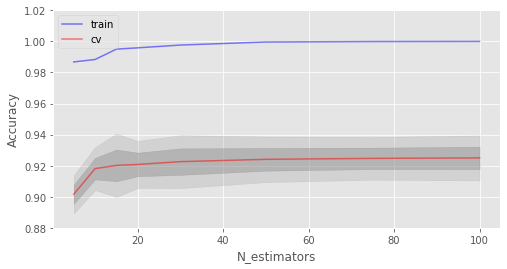

In [23]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize = (8, 4))
ax.plot(trees_grid, 
        train_acc.mean(axis = 1), 
        alpha = 0.5, 
        color = 'blue', 
        label = 'train'
       )
ax.plot(trees_grid, 
        test_acc.mean(axis = 1), 
        alpha = 0.5, 
        color = 'red', 
        label = 'cv'
       )
ax.fill_between(trees_grid, 
                test_acc.mean(axis = 1) - test_acc.std(axis = 1), 
                test_acc.mean(axis=1) + test_acc.std(axis=1), 
                color = '#888888', 
                alpha = 0.4
               )
ax.fill_between(trees_grid, 
                test_acc.mean(axis = 1) - 2 * test_acc.std(axis = 1), 
                test_acc.mean(axis = 1) + 2 * test_acc.std(axis = 1), 
                color = '#888888', 
                alpha = 0.2
               )
ax.legend(loc = 'best')
ax.set_ylim([0.88,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("N_estimators");

#### Como podemos observar, a partir de $30$ árvores, nossa performance chegou a uma saturação. Além disso, observamos que a partir de $50$ árvores,o modelo apresenta $100\%$ de acurácia, o que pode indicar uma situação de `overfit`. Vamos explorar agora o efeito da profundidade:

In [24]:
# Create lists to save accuracy values on the training and test sets
train_acc = []
test_acc = []
#temp_train_acc = []
#temp_test_acc = []
max_depth_grid = [3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]

for max_depth in max_depth_grid:
    rfc = RandomForestClassifier(n_estimators = 100, 
                                 random_state = 42, 
                                 n_jobs = -1, 
                                 max_depth = max_depth
                                )
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, 
                y_train
               )
        temp_train_acc.append(rfc.score(X_train, y_train))        
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best CV accuracy is {:.2f}% with {} max_depth".format(max(test_acc.mean(axis = 1)) * 100, 
                                                        max_depth_grid[np.argmax(test_acc.mean(axis = 1))]))

Best CV accuracy is 92.44% with 24 max_depth


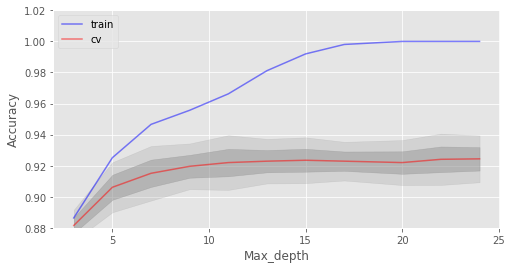

In [25]:
fig, ax = plt.subplots(figsize = (8, 4))
ax.plot(max_depth_grid, train_acc.mean(axis = 1), 
        alpha = 0.5, 
        color = 'blue', 
        label = 'train'
       )

ax.plot(max_depth_grid, 
        test_acc.mean(axis = 1), 
        alpha = 0.5, 
        color = 'red', 
        label = 'cv'
       )

ax.fill_between(max_depth_grid, 
                test_acc.mean(axis = 1) - test_acc.std(axis = 1), 
                test_acc.mean(axis = 1) + test_acc.std(axis = 1), 
                color = '#888888', 
                alpha = 0.4
               )

ax.fill_between(max_depth_grid, 
                test_acc.mean(axis = 1) - 2 * test_acc.std(axis = 1), 
                test_acc.mean(axis = 1) + 2 * test_acc.std(axis = 1), 
                color = '#888888', 
                alpha = 0.2
               )
ax.legend(loc = 'best')
ax.set_ylim([0.88, 1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max_depth");

#### Podemos observar que a profundidade da árvore possui um comportamento mais controlado em relação ao `overfit`. Vamos explorar o parâmetro `min_samples_leaf`:

In [26]:
# Create lists to save accuracy values on the training and test sets
train_acc = []
test_acc = []
#temp_train_acc = []
#temp_test_acc = []
min_samples_leaf_grid = [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]

for min_samples_leaf in min_samples_leaf_grid:
    rfc = RandomForestClassifier(n_estimators = 100, 
                                 random_state = 42, 
                                 n_jobs = -1, 
                                 min_samples_leaf = min_samples_leaf
                                )
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best CV accuracy is {:.2f}% with {} min_samples_leaf".format(max(test_acc.mean(axis = 1)) * 100, 
                                                        min_samples_leaf_grid[np.argmax(test_acc.mean(axis = 1))]))

Best CV accuracy is 92.50% with 1 min_samples_leaf


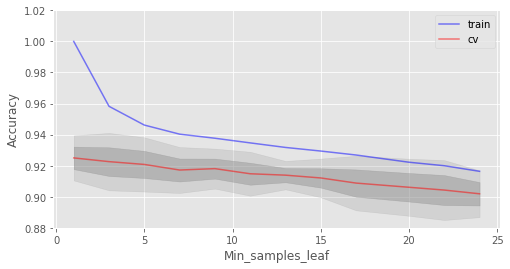

In [27]:
fig, ax = plt.subplots(figsize = (8, 4))
ax.plot(min_samples_leaf_grid, train_acc.mean(axis = 1), 
        alpha = 0.5, 
        color = 'blue', 
        label = 'train'
       )
ax.plot(min_samples_leaf_grid, test_acc.mean(axis = 1), 
        alpha = 0.5, 
        color = 'red', 
        label = 'cv'
       )
ax.fill_between(min_samples_leaf_grid, test_acc.mean(axis = 1) - test_acc.std(axis = 1), 
                test_acc.mean(axis = 1) + test_acc.std(axis = 1), color = '#888888', 
                alpha = 0.4
               )
ax.fill_between(min_samples_leaf_grid, test_acc.mean(axis = 1) - 2 * test_acc.std(axis = 1), 
                test_acc.mean(axis = 1) + 2 * test_acc.std(axis = 1), color = '#888888', 
                alpha = 0.2
               )
ax.legend(loc = 'best')
ax.set_ylim([0.88, 1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Min_samples_leaf");

#### Nesse caso, não temos um ganho substancial na acurácia no `dataset` de validação, mas conseguimos nos proteger do `overfitting` enquanto mantemos a acurácia a $\approx 92\%$. Vamos explorar o `max_features`. Para classificação, é recomendado usar $\sqrt{d}$ (número total de atributos).

In [28]:
# Create lists to save accuracy values on the training and test sets
train_acc = []
test_acc = []
#temp_train_acc = []
#temp_test_acc = []
max_features_grid = [2, 4, 6, 8, 10, 12, 14, 16]

for max_features in max_features_grid:
    rfc = RandomForestClassifier(n_estimators = 100, 
                                 random_state = 42, 
                                 n_jobs = -1, 
                                 max_features = max_features
                                )
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best CV accuracy is {:.2f}% with {} max_features".format(max(test_acc.mean(axis = 1)) * 100, 
                                                        max_features_grid[np.argmax(test_acc.mean(axis = 1))]))

Best CV accuracy is 92.50% with 4 max_features


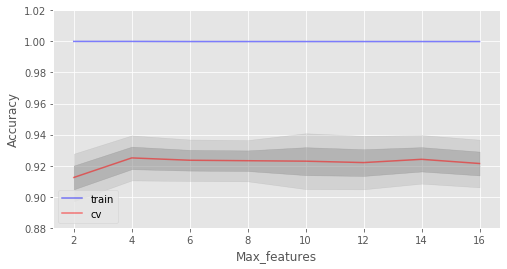

In [29]:
fig, ax = plt.subplots(figsize = (8, 4))
ax.plot(max_features_grid, train_acc.mean(axis = 1), 
        alpha = 0.5, 
        color = 'blue', 
        label = 'train'
       )

ax.plot(max_features_grid, test_acc.mean(axis = 1), 
        alpha = 0.5, 
        color = 'red', 
        label = 'cv'
       )

ax.fill_between(max_features_grid, test_acc.mean(axis = 1) - test_acc.std(axis = 1), 
                test_acc.mean(axis = 1) + test_acc.std(axis = 1), 
                color = '#888888', 
                alpha = 0.4
               )

ax.fill_between(max_features_grid, test_acc.mean(axis = 1) - 2 * test_acc.std(axis = 1), 
                test_acc.mean(axis = 1) + 2 * test_acc.std(axis = 1), 
                color = '#888888', 
                alpha = 0.2
               )

ax.legend(loc = 'best')
ax.set_ylim([0.88,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max_features");

#### No nosso caso, o número ótimo para esse hiperparâmetro é $4$, em que o melhor resultado é alcançado. Vamos descobrir agora a melhor combinação de hiperparâmetros via [`GridSearch`](https://towardsdatascience.com/optimizing-hyperparameters-in-random-forest-classification-ec7741f9d3f6):

In [30]:
# Initialize the set of parameters for exhaustive search and fit 


#parameters = {'max_features': [4, 7, 10, 13], 
#              'min_samples_leaf': [1, 3, 5, 7], 
#              'max_depth': [5, 10, 15, 20]}

parameters = {'max_features': [4, 7, 10], 
              'min_samples_leaf': [1, 3, 5], 
              'max_depth': [5, 10, 15]}


rfc = RandomForestClassifier(n_estimators = 100, 
                             random_state = 42, 
                             n_jobs = -1
                            )
gcv = GridSearchCV(rfc, 
                   parameters, 
                   n_jobs = -1, 
                   cv = skf, 
                   verbose = 1
                  )
gcv.fit(X, y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:   54.2s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15], 'max_features': [4, 7, 10],
                         'min_samples_leaf': [1, 3, 5]},
             verbose=1)

In [31]:
gcv.best_params_, gcv.best_score_

({'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 3},
 0.9246971109040075)

-----------

# Random Forest Feature Importance

In [32]:
rfc_best = RandomForestClassifier(n_estimators = 100, 
                                  max_depth = 20, 
                                  max_features = 10, 
                                  min_samples_leaf = 3, 
                                  random_state = 42, 
                                  n_jobs = -1
                                 )

rfc_best.fit(X, y)
rfc_best.score(X_train, y_train)

0.9583802024746907

#### É possível aplicar o atributo [`feature_importances_`](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html) para estudarmos a relevância de cada variável de nosso modelo.

No handles with labels found to put in legend.


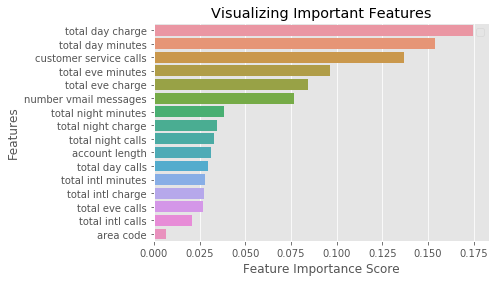

In [34]:
#import pandas as pd
feature_imp = pd.Series(rfc_best.feature_importances_, 
                        index = X.columns).sort_values(ascending = False)

#import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x = feature_imp, 
            y = feature_imp.index
           )

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

---------------

# Pros & Cons de Random Forests

## Pros:

- Alta precisão de previsão; terá melhor desempenho do que algoritmos lineares na maioria dos problemas; a precisão é comparável à do boosting.
- Robusto aos valores extremos, graças à amostragem aleatória.
- Insensível ao dimensionamento ou escala de recursos, bem como a quaisquer outras transformações monotônicas devido à seleção aleatória do subespaço.
- Não requer ajuste fino de parâmetros, funciona muito bem fora da caixa. Com o ajuste, é possível obter um ganho de precisão de 0,5 a 3%, dependendo da configuração e dos dados do problema.
- Eficiente para conjuntos de dados com um grande número de recursos e classes.
- Lida com variáveis ​​contínuas e discretas igualmente bem.
- Raramente sobre-ajusta ou causa Overfit. Na prática, um aumento no número da árvore quase sempre melhora a composição. Mas, depois de atingir um certo número de árvores, a curva de aprendizado está muito próxima da assíntota.
- Existem métodos desenvolvidos para estimar a importância dos recursos ou Feature Importance.
- Funciona bem com dados faltantes e mantém boa precisão, mesmo quando uma grande parte dos dados está ausente.
- Fornece meios para ponderar classes em todo o conjunto de dados, bem como para cada amostra de árvore.
- Pode ser utilizada para calcular as proximidades entre pares de exemplos que podem ser usados ​​subsequentemente em cluster, detecção de outlier ou representações de dados interessantes.
- A funcionalidade e as propriedades acima podem ser estendidas para dados não rotulados, para permitir cluster não supervisionado, visualização de dados e detecção de outlier.
- Facilmente paralelizado e altamente escalável.
 


## Cons:

- Em comparação com uma única árvore de decisão, a saída da Random Forest é mais difícil de interpretar.
- Não há valores p formais para a estimativa da significância das características.
- Executa métodos piores que os lineares no caso de dados esparsos: entradas de texto, conjunto de palavras, etc.
- Diferentemente da regressão linear, a Random Forest não pode extrapolar. Porém, isso também pode ser considerado uma vantagem, porque os Outliers não causam valores extremos nas florestas aleatórias.
- Propenso a Overfit em alguns problemas, especialmente quando se lida com dados ruidosos.
- No caso de variáveis categóricas com números de níveis variados, florestas aleatórias favorecem variáveis com um número maior de níveis. A árvore se ajustará mais a um recurso com muitos níveis, porque isso ganha maior precisão.
- Se um conjunto de dados contiver grupos de recursos correlatos com importância semelhante para as classes previstas, a preferência será dada a grupos menores.
- O modelo resultante é grande e requer muita RAM.

------------------

## Principais algoritmos simples de classificação para um DS

### KNN (K-Nearest Neighbors)
- [KNN Classification using Scikit-learn](https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn)
- [StatQuest: K-nearest neighbors, Clearly Explained](https://www.youtube.com/watch?v=HVXime0nQeI&t=203s&ab_channel=StatQuestwithJoshStarmer)

### Logistic Regression
- [Understanding Logistic Regression in Python](https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python)
- [Lecture 6.1 — Logistic Regression | Classification — — [ Machine Learning | Andrew Ng]](https://www.youtube.com/watch?v=-la3q9d7AKQ&ab_channel=ArtificialIntelligence-AllinOne)
- [StatQuest: Logistic Regression](https://www.youtube.com/watch?v=yIYKR4sgzI8)

### Naive Bayes
- [Naive Bayes Classification using Scikit-learn](https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn)
- [Probability Theory - The Math of Intelligence #6](https://www.youtube.com/watch?v=PrkiRVcrxOs)
- [Naïve Bayes Classifier - Fun and Easy Machine Learning](https://www.youtube.com/watch?v=CPqOCI0ahss&t=236s)

### SVM (Support Vector Machine)
- [Support Vector Machines with Scikit-learn](https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python)
- [Machine Learning Tutorial Python - 10 Support Vector Machine (SVM)](https://www.youtube.com/watch?v=FB5EdxAGxQg)

### Decision Tree
- [Decision Tree Classification in Python](https://www.datacamp.com/community/tutorials/decision-tree-classification-python)
- [StatQuest: Decision Trees](https://www.youtube.com/watch?v=7VeUPuFGJHk&t=23s&ab_channel=StatQuestwithJoshStarmer)
- [Let’s Write a Decision Tree Classifier from Scratch - Machine Learning Recipes #8](https://www.youtube.com/watch?v=LDRbO9a6XPU)